# Ritz method on a rank-one perturbation of a multiplication operator, with and without dissipative barrier

In this notebook we show the Ritz approximation of the rank-one perturbation 
$$\tilde{M}u = M_fu + (u, \varphi) \varphi,$$

where $\varphi = (\log(3) - 3\log(2) + \log(5) + \log(7) - \log(10))^{-1}$.

The actual spectrum of this operator should be $[0, 0.5]\cup[1, 1.5]\cup\{0.7, \sim4.4\}$,
and the eigenvalue at roughly 4.4 has been cropped out as it is not relevant to the demonstration.
What we are trying to show is the effects of a dissipative barrier, which in this case is

$$\tilde{M} + iP,$$
$$P = \text{ orthogonal projection onto } \mathrm{span}\{\phi_n: |n| \leq 25\}$$

where $\{\phi_n\}_{n \in \mathbb{Z}}$ is our orthonormal basis.

The dissipative barrier should make the eigenvalues 'jump' by $i$ into the positive imaginary semiplane
and leave the pollution on the x-axis.

In [1]:
from specpol.ritz import ptb_ritz
from specpol.plot import plot_ritz

from tqdm import tqdm 
import matplotlib.pyplot as plt

In [2]:
def step_slope(x):  # the symbol of our multiplication operator
    return x if x < 1/2 else x+1/2

def plot(ritz_results, dbm = None):
    # we add some extra lines and spans to our plots
    # to show where the 'actual' spectrum is
    fig, ax1, ax2 = plot_ritz(ritz_results, dbm=dbm)

    ax1.set_ylim(0,1.5)

    ax1.axhspan(0, 0.5, facecolor='green', alpha=0.2)
    ax1.axhspan(1, 1.5, facecolor='green', alpha=0.2)
    ax1.axhline(0.7, linestyle='dotted', alpha=0.3)

    ax2.set_ylim(-0.25,1.5)
    ax2.set_xlim(0,1.5)
    ax2.axvline(0.7, linestyle='dotted', alpha=0.3)

    plt.show()


In [3]:
ptb_specs = dict()
ptb_specs_dbm = dict()
for i in tqdm(range(50, 525, 25)):
    ptb_specs[i] = ptb_ritz(step_slope, 0.7, i, 161, dbm=False)
    ptb_specs_dbm[i] = ptb_ritz(step_slope, 0.7, i, 161, dbm=True)

100%|██████████| 19/19 [41:58<00:00, 132.54s/it]


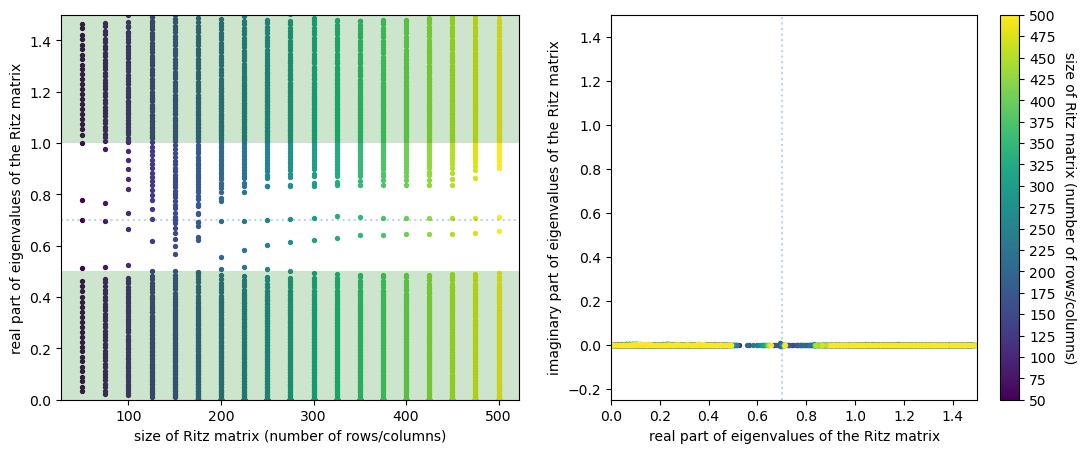

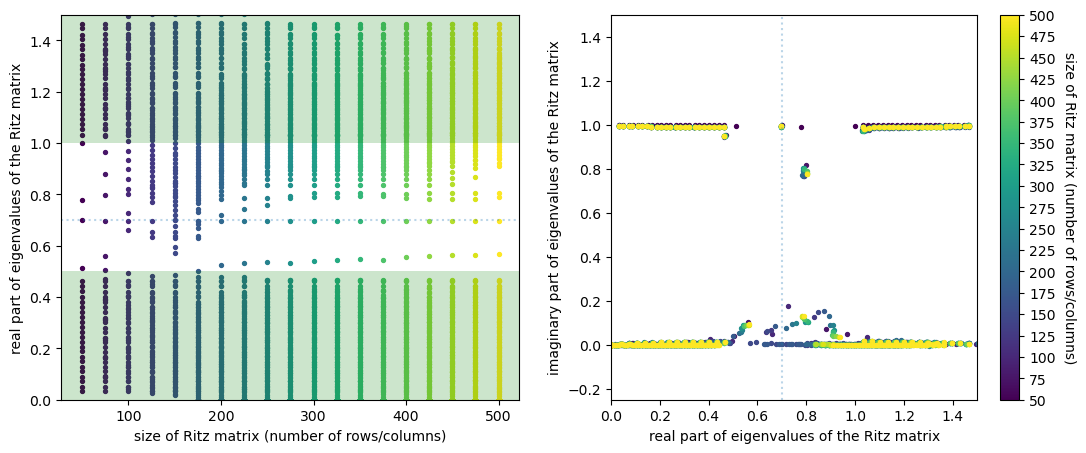

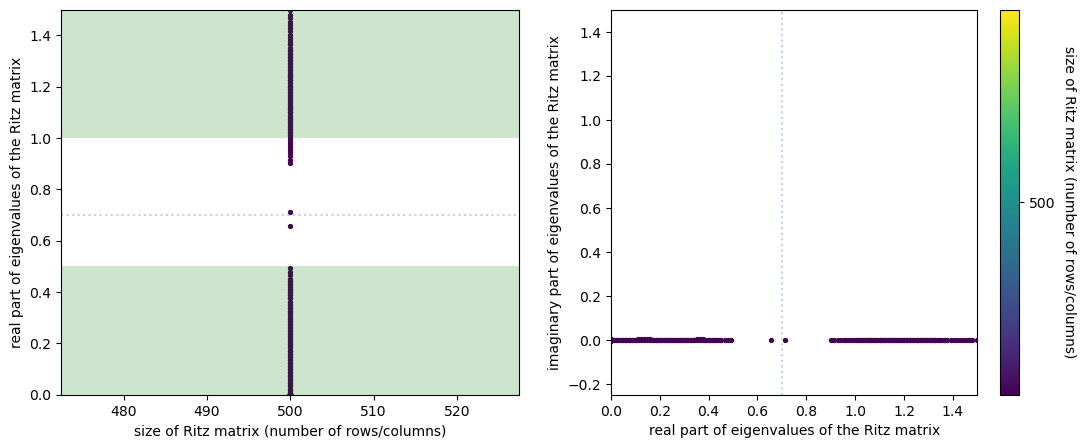

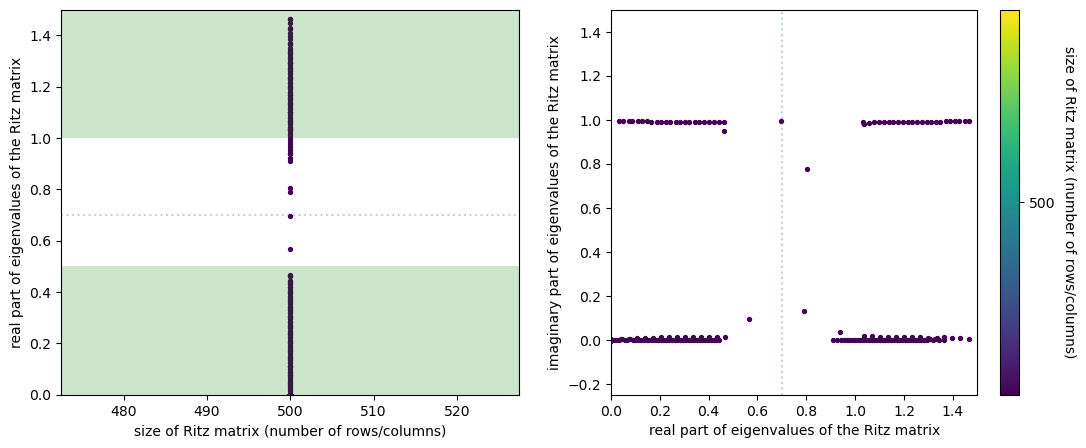

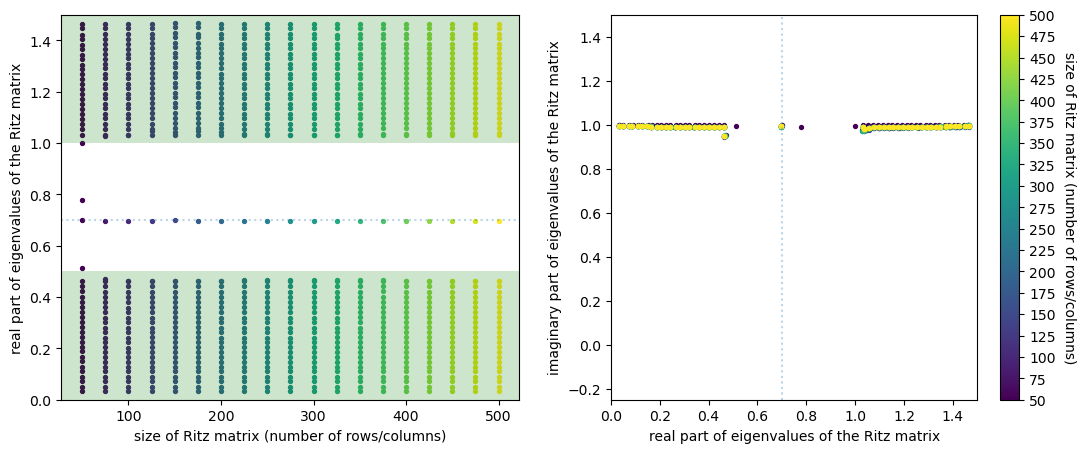

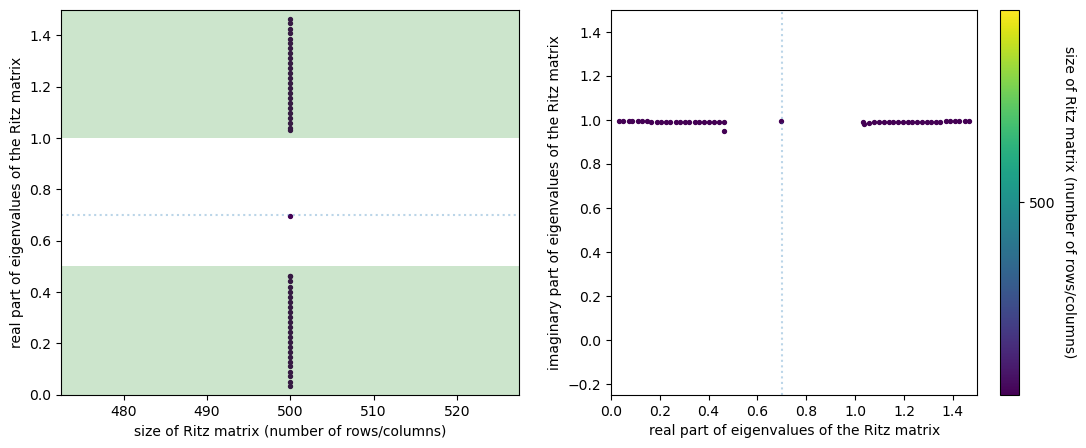

In [8]:
plot(ptb_specs)
plot(ptb_specs_dbm)
plot({500: ptb_specs[500]})
plot({500: ptb_specs_dbm[500]})
plot(ptb_specs_dbm, dbm=0.9)
plot({500: ptb_specs_dbm[500]}, dbm=0.9)